# A/B Testing
# HW 2

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scenario

### You have four advertisement options (bandits), and your task is to design an experiment using Epsilon Greedy and Thompson Sampling.

## Design of Experiment

### A bandit class has already been created for you. It is an abstract class with abstract methods. You must not exclude anything from the Bandit() class. However, you can add more stuff if you need.

Bandit_Reward=[1,2,3,4]

NumberOfTrials: 20000

In [68]:
bandit_rewards_list = [1,2,3,4]
num_trials = 20000

## - Create EpsilonGreedy() and ThompsonSampling() classes and methods (inherited from Bandit()). + Report
## - Create a Bandit Class + Report

In [69]:
from Bandit import Bandit
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

DataFrame


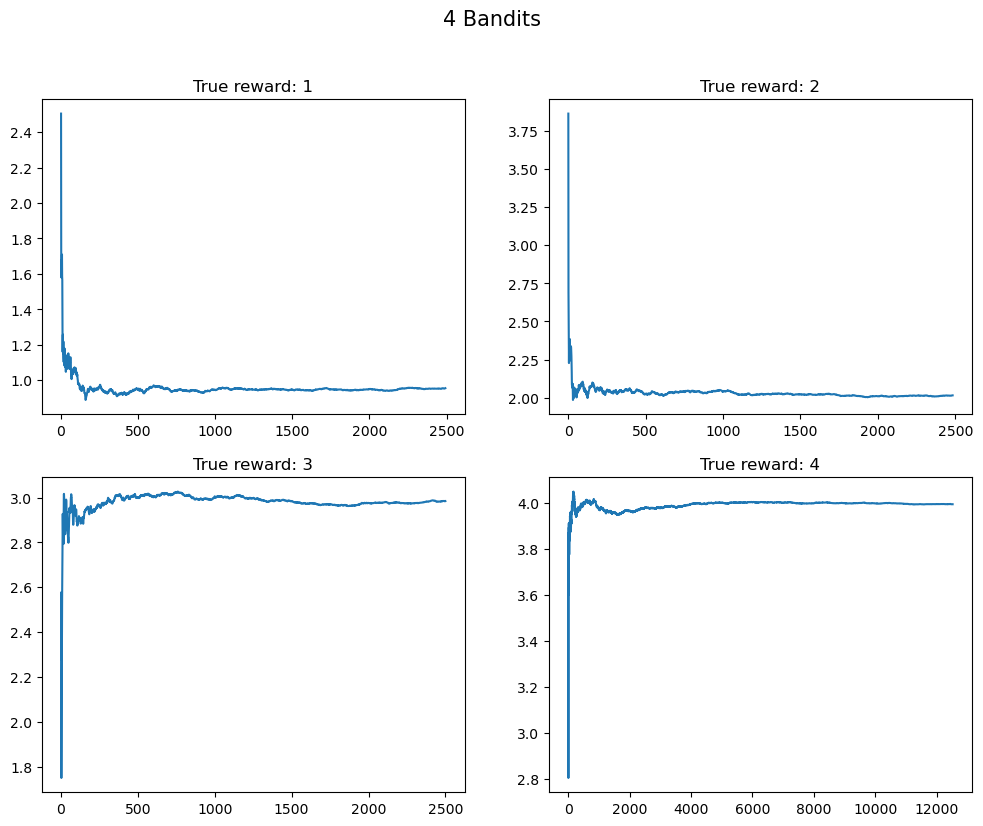

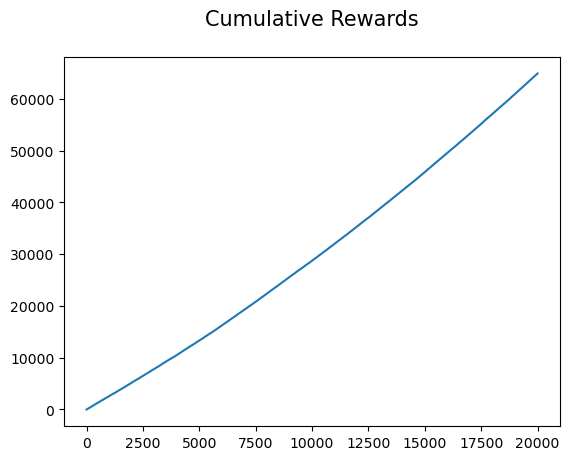

total reward : 64869.894522371615
cumulative reward : [3.86354912e+00 6.13994659e+00 9.86103041e+00 ... 6.48613095e+04
 6.48655299e+04 6.48698945e+04]


In [70]:
class EpsilonGreedyBandit(Bandit):
    """
    EpsilonGreedyBandit class models an epsilon-greedy bandit with the following attributes and methods.

    Attributes:
        reward (float): The true reward of the bandit.

    Methods:
        pull(): Pulls a value from the bandit.
        update(x: float): Updates the estimated reward of the bandit.
        plot1(): Plots the learning process of the bandits.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Runs the experiment with given bandits, the number of trials, and an option to save the results.
        report(path_to_save: str, to_save: bool): Generates and prints a report of the experiment.
        create_data(): Sets up the dataframe for data storage.
        update_epsilon(): Dynamically updates epsilon with a decay rate of 1/t.

    """
    def __init__(self, reward):
        """
        Initializes a new instance of the EpsilonGreedyBandit class with the following parameter:

        Args:
            reward (float): The true reward of the bandit.

        """
        self.reward = reward  
        self.reward_estimate = 0.  
        self.N = 0  
        self.learning_process = []  
        self.bandits = None  
        self.epsilon = 1  

    def pull(self):
        """
        Pulls a value from the bandit based on its true reward. The value is sampled from a normal distribution with a mean equal to the true bandit reward and a standard deviation of 1.

        """
        return np.random.normal(self.reward, 1)  # Sample a reward from a normal distribution

    def update(self, x):
        """
        Updates the estimated reward of the bandit based on a newly pulled value.

        Args:
            x (float): The newly pulled value used to update the estimated reward.

        """
        self.N += 1  
        self.reward_estimate = ((self.N - 1) * self.reward_estimate + x) / self.N  
        self.learning_process.append(self.reward_estimate)  

    def __repr__(self):
        return f'A bandit with a true reward of {self.reward} and an estimated reward of {self.reward_estimate}'

    def plot1(self):
        """
        Plots the learning curves after the experiment for all existing bandits. It creates a subplot for each bandit's learning curve.

        """
        if self.bandits is None:  
            raise Exception('Run the experiment first')
        fig, axs = plt.subplots(2, 2, figsize=(12, 9))  
        plt.suptitle('4 Bandits', size=15) 
        for index, bandit in enumerate(self.bandits):  
            x_index = 1 if index >= 2 else 0
            y_index = index % 2
            axs[x_index, y_index].plot(bandit.learning_process)
            axs[x_index, y_index].set_title(f'True reward: {bandit.reward}')
        plt.show()

    def experiment(self, bandit_rewards, num_trials, path_to_save='', to_save=False):
        """
        Runs an experiment with the given bandit rewards and the number of trials.

        Args:
            bandit_rewards (list): List of true rewards for bandits.
            num_trials (int): The number of iterations for the experiment.
            path_to_save (str): The path for saving the results.
            to_save (bool): Determines whether to save the results.

        """
        if to_save:  
            self.create_data()
        self.bandits = [EpsilonGreedyBandit(reward) for reward in bandit_rewards]  
        self.rewards = np.zeros(num_trials)   
        for i in range(num_trials):  
            if np.random.random() < self.epsilon:  
                index = np.random.randint(len(self.bandits))
            else:
                index = np.argmax([b.reward_estimate for b in self.bandits])  
            selected_bandit = self.bandits[index]  
            x = selected_bandit.pull()  
            if to_save:  
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                self.data = self.data.append(new_row, ignore_index=True)
            self.rewards[i] = x  
            selected_bandit.update(x)  
            self.update_epsilon(i, num_trials) 
        self.report(path_to_save, to_save)  
        return self.rewards

    def report(self, path_to_save, to_save=False):
        """
        Generates a report of the experiment and prints it.

        Args:
            path_to_save (str): The path for saving the results of the experiment.
            to_save (bool): Determines whether to save the results.

        """
        
        if self.bandits is None:  
            raise Exception('Run the experiment first')

        
        self.plot1()

        
        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Cumulative Rewards\n', size=15)
        plt.show()

        
        if to_save:
            self.data.to_csv(path_to_save, index=False)

        cumulative_reward = cumulative_rewards[-1]
        print(f'total reward : {cumulative_reward}')
        print(f'cumulative reward : {cumulative_rewards}')

    

    def create_data(self):
        """
        Initializes the dataset for storing data.

        """
        self.data = pd.DataFrame(columns=['Bandit', 'Reward', 'Algorithm']) 
        print('DataFrame')

    def update_epsilon(self, current_trial, num_trials):
        """
        Dynamically updates the epsilon based on the current trial and the overall number of trials.

        Args:
            current_trial: The current trial.
            num_trials: The total number of trials for the experiment.

        """
        self.epsilon = 1 - (current_trial / num_trials)  #epsilon decay rate 1/t
        

        
eps_rewards = EpsilonGreedyBandit(Bandit).experiment(bandit_rewards_list, num_trials, 'EpsGre.csv', to_save=True)

In [ ]:
2)

DataFrame


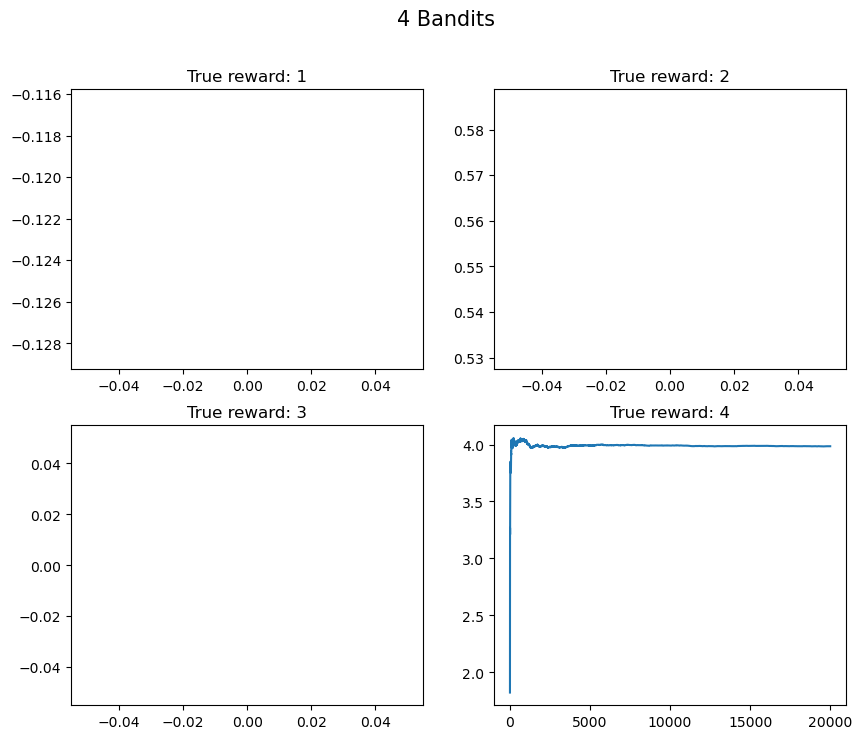

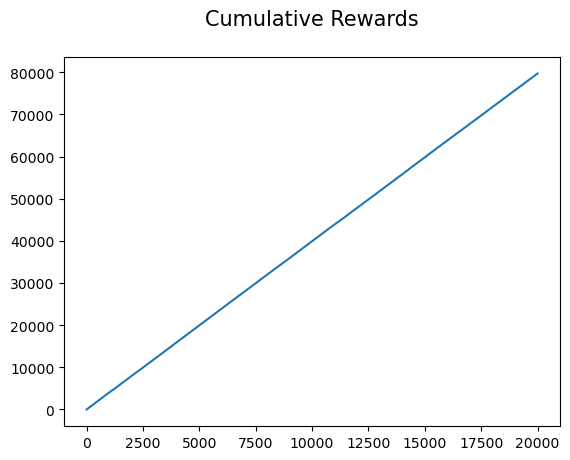

total reward: 79692.93310945992
cumulative reward : [1.11627960e+00 4.76261864e+00 8.90972637e+00 ... 7.96852427e+04
 7.96878462e+04 7.96929331e+04]


In [74]:
class Bandit:
    pass 

class ThompsonSamplingBandit(Bandit):
    """
    ThompsonSamplingBandit class represents a bandit using the Thompson Sampling algorithm with the following attributes and methods.

    Attributes:
        reward (float): The true reward of the bandit.

    Methods:
        pull(): Pulls a value from the bandit based on the true reward.
        sample(): Samples a value from the estimated reward.
        update(x: float): Updates the estimated reward of the bandit.
        plot1(): Plots the learning process of the bandits.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Runs an experiment with given bandits, the number of trials, and an option to save the results.
        report(path_to_save: str, to_save: bool): Generates and prints a report of the experiment.
        create_data(): Sets up a dataframe for data storage.
    """
    def __init__(self, reward):
        """
        Initializes a new instance of the ThompsonSamplingBandit class with the following parameter:

        Args:
            reward (float): The true reward of the bandit.

        """
        self.reward = reward  
        self.m = 0  
        self.lambda_ = 1  
        self.tau = 1  
        self.N = 0  
        self.sum_x = 0  
        self.learning_process = []  

    def pull(self):
        """
        Pulls a value from the bandit based on the true reward. The value is sampled from a normal distribution with mean equal to the true bandit reward and standard deviation of 1.

        """
        return np.random.randn() / np.sqrt(self.tau) + self.reward

    def sample(self):
        """
        Samples a value from the bandit based on the estimated reward.
        """
        return np.random.randn() / np.sqrt(self.lambda_) + self.m

    def update(self, x):
        """
        Updates the estimated reward of the bandit based on a newly pulled value.

        Args:
            x (float): The newly pulled value used to update the estimated reward.

        """
        self.lambda_ += self.tau  
        self.sum_x += x  
        self.m = (self.tau * self.sum_x) / self.lambda_  
        self.learning_process.append(self.m)  
        self.N += 1  

    def __repr__(self):
        return f'A bandit with a true reward of {self.reward} and an estimated reward of {self.m}'

    def plot1(self):
        """
        Plots the learning curves after the experiment for all existing bandits. It creates a subplot for each bandit's learning curve.

        """
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
        plt.suptitle('4 Bandits', size=15)
        for index, bandit in enumerate(self.bandits):
            x_index = 1 if index >= 2 else 0
            y_index = index % 2
            axs[x_index, y_index].plot(bandit.learning_process)
            axs[x_index, y_index].set_title(f'True reward: {bandit.reward}')
        plt.show()

    def experiment(self, bandit_rewards, num_trials, path_to_save, to_save=False):
        """
        Runs an experiment with the given bandit rewards and the number of trials.

        Args:
            bandit_rewards (list): List of true rewards for bandits.
            num_trials (int): The number of iterations for the experiment.
            path_to_save (str): The path for saving the results.
            to_save (bool): Determines whether to save the results.

        """
        if to_save:  
            self.create_data()
        self.bandits = [ThompsonSamplingBandit(reward) for reward in bandit_rewards]  
        self.rewards = np.zeros(num_trials)  
        self.regret = []
        for i in range(num_trials):
            index = np.argmax([b.sample() for b in self.bandits])  
            selected_bandit = self.bandits[index]
            x = selected_bandit.pull()
            if to_save:
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                self.data = self.data.append(new_row, ignore_index=True)
            self.rewards[i] = x
            self.regret.append(selected_bandit.reward - x)
            selected_bandit.update(x)
        self.report(path_to_save, to_save)
        return self.rewards

    def report(self, path_to_save, to_save=False):
        """
        Generates a report of the experiment and prints it.

        Args:
            path_to_save (str): The path for saving the results of the experiment.
            to_save (bool): Determines whether to save the results.

        """
        if self.bandits is None:
            raise Exception('Run the experiment first')
        
      
        self.plot1()

        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Cumulative Rewards\n', size=15)
        plt.show()

        if to_save:
            self.data.to_csv(path_to_save, index=False)

   
        cumulative_reward = cumulative_rewards[-1]
        print(f'total reward: {cumulative_reward}')
        print(f'cumulative reward : {cumulative_rewards}')

        

    def create_data(self):
        """
        Initializes the dataset for storing data.

        """
        self.data = pd.DataFrame(columns=['Bandit', 'Reward', 'Algorithm'])
        print('DataFrame')
        
        
thompson_rewards = ThompsonSamplingBandit(Bandit).experiment(bandit_rewards_list, num_trials, 'ThmpSampl.csv', to_save=True)

DataFrame


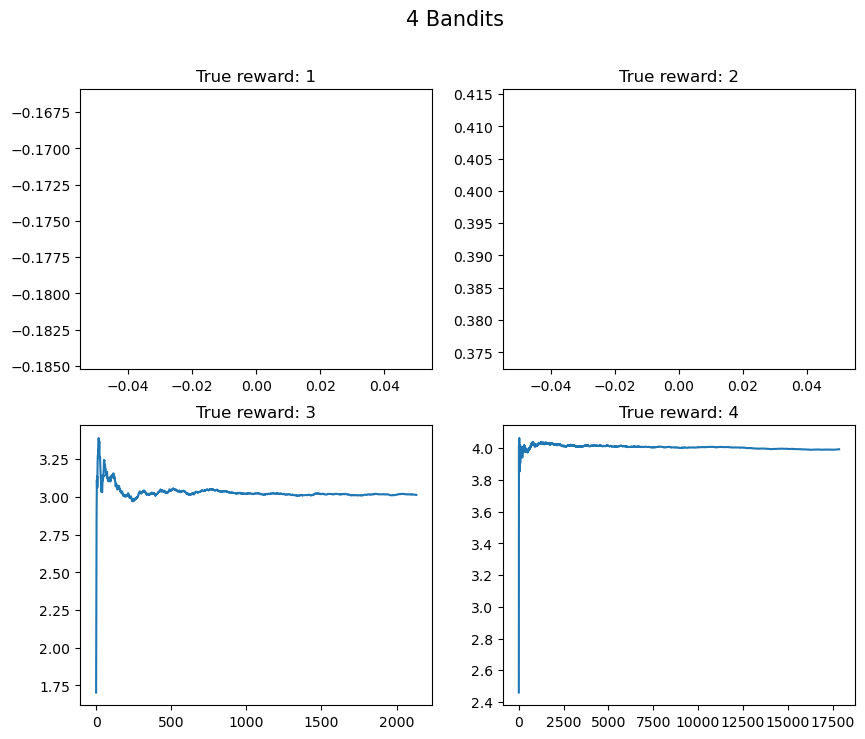

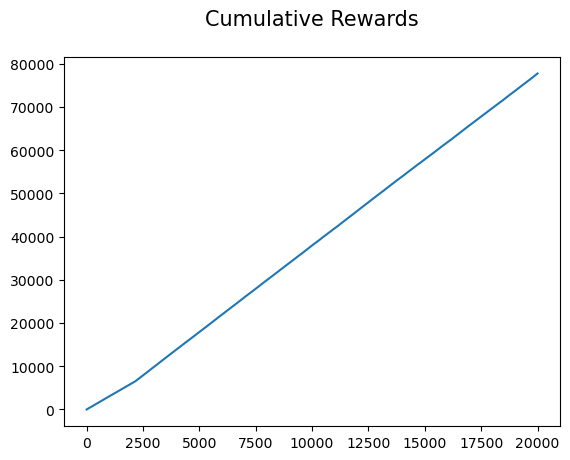

total reward: 77775.06559061674
cumulative reward: [7.88109924e-01 4.19457240e+00 7.28290832e+00 ... 7.77664080e+04
 7.77706383e+04 7.77750656e+04]


In [72]:
class Bandit:
    pass  

class ThompsonSamplingBandit(Bandit):
    """
    ThompsonSamplingBandit class represents a bandit using the Thompson Sampling algorithm with the following attributes and methods.

    Attributes:
        reward (float): The true reward of the bandit.

    Methods:
        pull(): Pulls a value from the bandit based on the true reward.
        sample(): Samples a value from the estimated reward.
        update(x: float): Updates the estimated reward of the bandit.
        plot1(): Plots the learning process of the bandits.
        experiment(bandit_rewards: list, num_trials: int, path_to_save: str, to_save: bool): Runs an experiment with given bandits, the number of trials, and an option to save the results.
        report(path_to_save: str, to_save: bool): Generates and prints a report of the experiment.
        create_data(): Sets up a dataframe for data storage.
    """
    def __init__(self, reward):
        """
        Initializes a new instance of the ThompsonSamplingBandit class with the following parameter:

        Args:
            reward (float): The true reward of the bandit.

        """
        self.reward = reward  
        self.m = 0  
        self.lambda_ = 1  
        self.tau = 1  
        self.N = 0  
        self.sum_x = 0  
        self.learning_process = []  

    def pull(self):
        """
        Pulls a value from the bandit based on the true reward. The value is sampled from a normal distribution with mean equal to the true bandit reward and standard deviation of 1.

        """
        return np.random.randn() / np.sqrt(self.tau) + self.reward

    def sample(self):
        """
        Samples a value from the bandit based on the estimated reward.
        """
        return np.random.randn() / np.sqrt(self.lambda_) + self.m

    def update(self, x):
        """
        Updates the estimated reward of the bandit based on a newly pulled value.

        Args:
            x (float): The newly pulled value used to update the estimated reward.

        """
        self.lambda_ += self.tau  # Update lambda
        self.sum_x += x  # Update the cumulative sum
        self.m = (self.tau * self.sum_x) / self.lambda_  # Update the reward estimate
        self.learning_process.append(self.m)  # Update the learning process list
        self.N += 1  # Increment the iteration count

    def __repr__(self):
        return f'A bandit with a true reward of {self.reward} and an estimated reward of {self.m}'

    def plot1(self):
        """
        Plots the learning curves after the experiment for all existing bandits. It creates a subplot for each bandit's learning curve.

        """
        fig, axs = plt.subplots(2, 2, figsize=(10, 8))
        plt.suptitle('4 Bandits', size=15)
        for index, bandit in enumerate(self.bandits):
            x_index = 1 if index >= 2 else 0
            y_index = index % 2
            axs[x_index, y_index].plot(bandit.learning_process)
            axs[x_index, y_index].set_title(f'True reward: {bandit.reward}')
        plt.show()

    def experiment(self, bandit_rewards, num_trials, path_to_save, to_save=False):
        """
        Runs an experiment with the given bandit rewards and the number of trials.

        Args:
            bandit_rewards (list): List of true rewards for bandits.
            num_trials (int): The number of iterations for the experiment.
            path_to save (str): The path for saving the results.
            to_save (bool): Determines whether to save the results.

        """
        if to_save:  
            self.create_data()
        self.bandits = [ThompsonSamplingBandit(reward) for reward in bandit_rewards]  
        self.rewards = np.zeros(num_trials)  
        self.regret = []
        for i in range(num_trials):
            index = np.argmax([b.sample() for b in self.bandits])  
            selected_bandit = self.bandits[index]
            x = selected_bandit.pull()
            if to_save:
                new_row = {'Bandit': index, 'Reward': x, 'Algorithm': selected_bandit.__class__.__name__}
                self.data = self.data.append(new_row, ignore_index=True)
            self.rewards[i] = x
            self.regret.append(selected_bandit.reward - x)
            selected_bandit.update(x)
        self.report(path_to_save, to_save)
        return self.rewards

    def report(self, path_to_save, to_save=False):
        """
        Generates a report of the experiment and prints it.

        Args:
            path_to_save (str): The path for saving the results of the experiment.
            to_save (bool): Determines whether to save the results.

        """
        if self.bandits is None:
            raise Exception('Run the experiment first')
        
        self.plot1()

      
        cumulative_rewards = np.cumsum(self.rewards)
        plt.plot(cumulative_rewards)
        plt.title('Cumulative Rewards\n', size=15)
        plt.show()

      
        if to_save:
            self.data.to_csv(path_to_save, index=False)

    
        cumulative_reward = cumulative_rewards[-1]
        print(f'total reward: {cumulative_reward}')
        print(f'cumulative reward: {cumulative_rewards}')

        

    def create_data(self):
        """
        Initializes the dataset for storing data.

        """
        self.data = pd.DataFrame(columns=['Bandit', 'Reward', 'Algorithm'])
        print('DataFrame')

        
thompson_rewards = ThompsonSamplingBandit(Bandit).experiment(bandit_rewards_list, num_trials, 'ThmpSampl.csv', to_save=True)

## Comparison of Epsilon and Thompson rewards¶

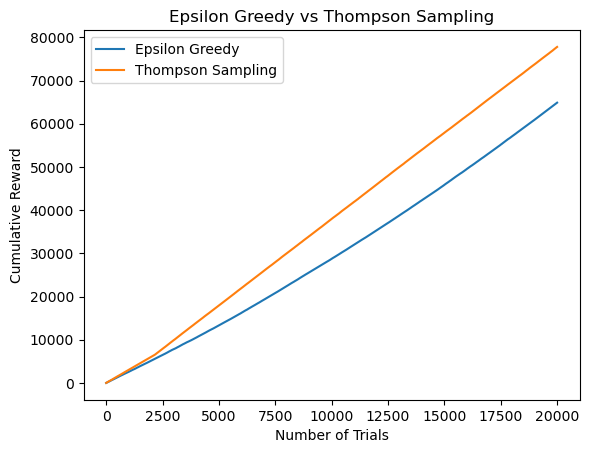

In [73]:
def compare(epsilon_rewards, thompson_rewards, num_trials):
    """
    A function for visualizing and comparing the rewards obtained using Epsilon-Greedy and Thompson Sampling algorithms.

    Args:
        epsilon_rewards (list): Rewards obtained using the Epsilon-Greedy algorithm.
        thompson_rewards (list): Rewards obtained using the Thompson Sampling algorithm.
        num_trials (int): The total number of trials or iterations.
    """
    plt.plot(np.arange(num_trials), np.cumsum(epsilon_rewards), label='Epsilon Greedy')
    plt.plot(np.arange(num_trials), np.cumsum(thompson_rewards), label='Thompson Sampling')
    plt.xlabel('Number of Trials')
    plt.ylabel('Cumulative Reward')
    plt.title('Epsilon Greedy vs Thompson Sampling')
    plt.legend()
    plt.show()
    
compare(eps_rewards, thompson_rewards, num_trials)